<a href="https://colab.research.google.com/github/alhamedy/Incentive-based-mechanism/blob/main/Scenario_1_Stackelberg_incentive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration: 1
Reward: 1.65, Penalty: -0.42
p=1, his old score 0, has new score=0.33, his decision=accept
p=2, his old score 1, has new score=1.13, his decision=accept
p=3, his old score 6, has new score=5.13, his decision=reject
p=4, his old score 3, has new score=2.73, his decision=reject
p=5, his old score 4, has new score=3.53, his decision=reject
p=6, his old score 5, has new score=4.33, his decision=reject
p=7, his old score 6, has new score=5.13, his decision=reject
p=8, his old score 0, has new score=0.33, his decision=accept
p=9, his old score 1, has new score=1.13, his decision=accept
p=10, his old score 2, has new score=1.93, his decision=reject
Level of participation: 0.40
----------------------------------------------
Reward: 1.65, Penalty: -0.42, Participants: 4
----------------------------------------------
Iteration: 2
Reward: 2.01, Penalty: -0.69
p=1, his old score 0, has new score=0.40, his decision=accept
p=2, his old score 1, has new score=1.20, his decision=accept
p=

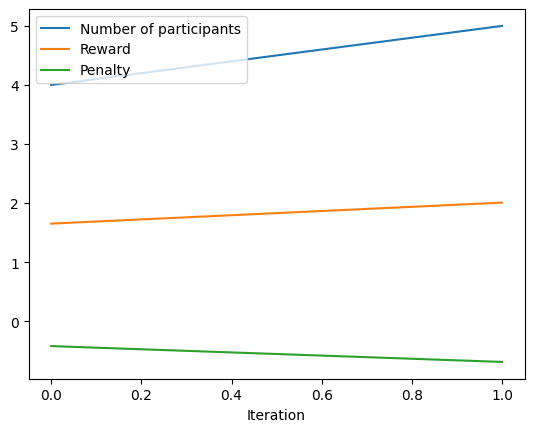

In [ ]:
from numpy.core.numeric import count_nonzero
import random
import matplotlib.pyplot as plt

num_followers = 10
min_reputation = 0
max_reputation = 6
reward_range = (1, 6)
penalty_range = (-1.0, 0.0)
optimal_participants = 5
max_iterations = 100

# Initialize the number of participants to 0 and create empty lists to store the results
num_participants = 0
rewards = []
penalties = []
num_accepts = []
behaviors = []
participation_levels = []  # New list to store the level of participation

reputation_scores = [0, 1, 6, 3, 4, 5, 6, 0, 1, 2]
# reputation_scores = [0, 1, 6, 3, 4, 5, 6, 0, 1, 2, 5, 6, 4, 3, 2]
#reputation_scores = [0, 1, 6, 3, 4, 5, 6, 0, 1, 2, 5, 6, 4, 3, 2, 3, 4, 5, 6, 0]

# Loop until the optimal number of participants is reached or the maximum number of iterations is reached
for iteration in range(max_iterations):
    # Generate a new reward and penalty score for the leader
    reward = random.uniform(*reward_range)
    penalty = random.uniform(*penalty_range)

    # Determine the behavior of each follower based on their current reputation score and the reward/penalty
    new_scores = []
    behaviors = []
    print(f"Iteration: {iteration+1}")
    print(f"Reward: {reward:.2f}, Penalty: {penalty:.2f}")
    for j in range(num_followers):
        old_score = reputation_scores[j]
        new_score = min(old_score * 0.8 + reward * 0.2, 6)
        new_scores.append(new_score)

        if new_score >= old_score:
            behaviors.append("accept")
        else:
            behaviors.append("reject")

        print(f"p={j+1}, his old score {old_score}, has new score={new_score:.2f}, his decision={behaviors[j]}")

    # Count the number of followers who accept the job
    num_accept = behaviors.count("accept")
    participation = num_accept / num_followers  # Calculate the level of participation
    participation_levels.append(participation)  # Add the level of participation to the list
    print(f"Level of participation: {participation:.2f}")  # Print the level of participation

    print("----------------------------------------------")
    # Print reward, penalty, and number of participants
    print(f"Reward: {reward:.2f}, Penalty: {penalty:.2f}, Participants: {num_accept}")
    print("----------------------------------------------")

    # Append the results to the corresponding lists
    rewards.append(reward)
    penalties.append(penalty)
    num_accepts.append(num_accept)

    # Update the number of participants and reputation scores if the optimal number of participants is reached
    if num_accept == optimal_participants:
        num_participants = num_accept
        print(f"Reward={reward:.2f} and Penalty={penalty:.2f} is the optimal Nash equilibrium")
        # reputation_scores = new_scores
        break

    elif num_participants < num_accept:
        num_participants = num_accept

# Print the results
if num_participants == optimal_participants:
    print(f"Optimal participants: {num_participants}")
else:
    print(f"Highest number of participants: {num_participants}")

for i in range(len(num_accepts)):
    if num_accepts[i] == num_participants:
        print(f"Reward = {rewards[i]:.2f} and Penalty = {penalties[i]:.2f}")


fig, ax = plt.subplots()
ax.plot(range(len(num_accepts)), num_accepts, label="Number of participants")
ax.plot(range(len(rewards)), rewards, label="Reward")
ax.plot(range(len(penalties)), penalties, label="Penalty")
#ax.plot(range(len(participation_levels)), participation_levels, label="Participation Level")  # Plot participation levels
ax.set_xlabel("Iteration")
#ax.set_ylabel("Number of participants / Level of participation")
ax.legend()
plt.show()
